In [25]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [26]:
train = pd.read_csv('./../snakemake/feature_extraction/X_train_-7_0_100_both_resistance.csv', delimiter = ',')
test  = pd.read_csv('./../snakemake/prepare_test_data/X_test_-7_0_100_both_resistance.csv', delimiter = ',')

train['label'] = 'train'
test['label'] = 'test'

clinical = pd.concat([
    train,
    test
])

In [27]:
#clinical

In [28]:
gender = clinical[['label', 'Geschlecht']]

In [29]:
counts = gender.groupby('Geschlecht').count()
np_counts = np.array(counts['label'])
#np_counts

In [30]:
#counts

### add the 5 already removed people:
- w; 19699
- m; 19872
- m; 11424
- m; 21768
- w; 18180

In [31]:
dfAges = pd.DataFrame(data = clinical[['Alter']], columns=['Alter'])
#print(dfAges)

addAges = pd.DataFrame(data = [19699, 19872, 11424, 21768, 18180],  columns=['Alter'])
#print(addAges)

both = pd.concat([addAges, dfAges], ignore_index=True)
#print(both)
#print(len(both))

years = []
for age in both['Alter']:
    years.append(int((age)/365.25))

#print(years)

In [32]:
len(years)

847

In [33]:
mean = both['Alter'].mean()
meanYears = mean/365.25

#print(mean, meanYears)
#mean = str(mean)

median = both['Alter'].median()
medianYears = median/365.25
#print(median, medianYears)

In [34]:
minimum = both['Alter'].min()
#print(minimum)
#mean = str(mean)

maximum = both['Alter'].max()
#print(maximum)

#print(len(years))

In [35]:
import collections, numpy
a = numpy.array(years)
counter = dict(collections.Counter(a))
#print((counter))

In [36]:
#years

In [37]:
yearArray = list(counter.keys())
countsArray = list(counter.values())
#print(yearArray, countsArray)                  

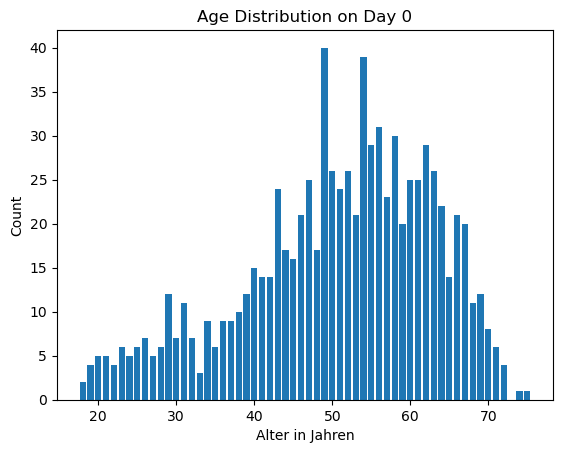

In [38]:
fig, ax = plt.subplots()
ax.bar(yearArray, countsArray)

ax.set_ylabel('Count')
ax.set_title('Age Distribution on Day 0')
ax.set_xlabel('Alter in Jahren')
#plt.show()
plt.savefig('age_distribution_day_0.png')

In [39]:
dfAges['Years'] = ((dfAges['Alter'] / 365.25))
dfAgesInt = dfAges.astype({'Years':'int'})
#print(dfAges, dfAgesInt)

In [40]:
dfAges = pd.DataFrame(pd.Series(years).rename('Years'))

In [41]:
plot = alt.Chart(dfAges, title='Distribution of Ages on Day 0').mark_boxplot(size=40).encode(
    y=alt.Y('Years:Q', bin=False, title= 'Age in Years'),
)

(plot).properties(
    width=80
)

alt.Chart(...)

In [42]:
plot = alt.Chart(dfAgesInt, title='Distribution of Ages on Day 0').mark_bar(size=7).encode(
    x=alt.X('Years:Q', bin=False, title= 'Age in Years'),
    y=alt.Y('count()', title='Number of Patients'),
)

(plot).properties(
    width=700,
    height=350
)

alt.Chart(...)

In [44]:
plot = alt.Chart(dfAgesInt, title='Distribution of Ages on Day 0 (with Median)').mark_bar(size=5).encode(
    x=alt.X('Years:Q', bin=False, title= 'Age in Years'),
    y=alt.Y('count()', title='Number of Patients'),
)
line = alt.Chart(pd.DataFrame({'y': [medianYears]})).mark_rule(color='red', size= 2).encode(x='y')

(plot+ line).properties(
    width=700,
    height=350
)

alt.LayerChart(...)